In [ ]:
!nvidia-smi

Wed Apr 17 06:18:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip install -q inference-gpu[yolo-world]==0.9.12rc1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.0/301.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.8/251.8 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q supervision==0.19.0rc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.8/90.8 kB 3.3 MB/s eta 0:00:00


In [ ]:
import cv2
import supervision as sv

from tqdm import tqdm
from inference.models.yolo_world.yolo_world import YOLOWorld

[04/17/24 06:20:36] WARNING  Your inference package version 0.9.12rc1 is out of date! Please upgrade ]8;id=492949;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py\__init__.py]8;;\:]8;id=816220;file:///usr/local/lib/python3.10/dist-packages/inference/core/__init__.py#35\35]8;;\
                             to version 0.9.20 of inference for the latest features and bug fixes by               
                             running `pip install --upgrade inference`.                                            

In [ ]:
!wget -P {HOME} -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -P {HOME} -q https://media.roboflow.com/supervision/cookbooks/yellow-filling.mp4

In [ ]:
model = YOLOWorld(model_id="yolo_world/l")

In [ ]:
classes = ["road", "sidewalk", "parking", "rail track", "person", "rider", "car",
    "truck", "bus", "on rails", "motorcycle", "bicycle",
    "building", "wall", "pole",
    "sky", "animal", "auto rickshaw", "vegetation", "billboard"]
model.set_classes(classes)

In [ ]:
SOURCE_IMAGE_PATH = "/content/drive/MyDrive/Screenshots/Screenshot 2024-04-08 135724.png"

In [ ]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image)
detections = sv.Detections.from_inference(results)

In [ ]:
BOUNDING_BOX_ANNOTATOR = sv.BoundingBoxAnnotator(thickness=1)
LABEL_ANNOTATOR = sv.LabelAnnotator(text_thickness=1, text_scale=1, text_color=sv.Color.BLACK)

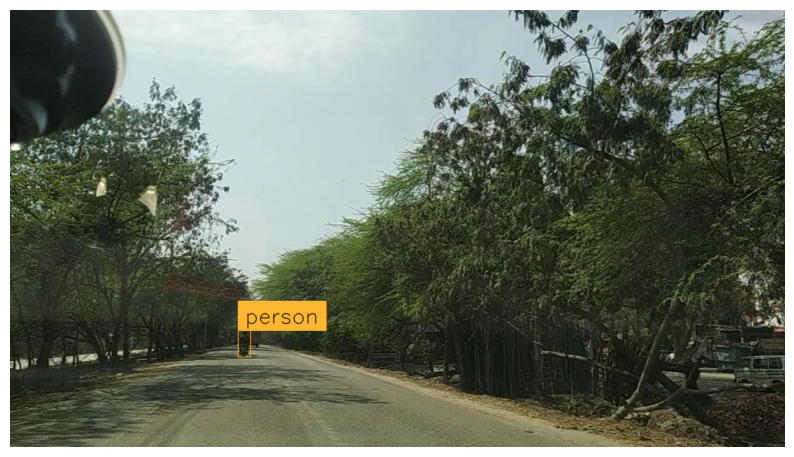

In [ ]:
annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))

In [ ]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.04)
detections = sv.Detections.from_inference(results)

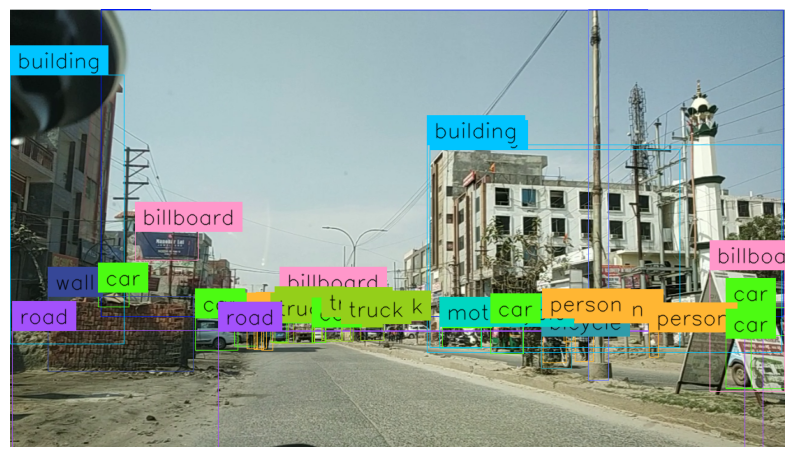

In [ ]:
labels = [
    f"{classes[class_id]}"
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]

annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)
sv.plot_image(annotated_image, (10, 10))

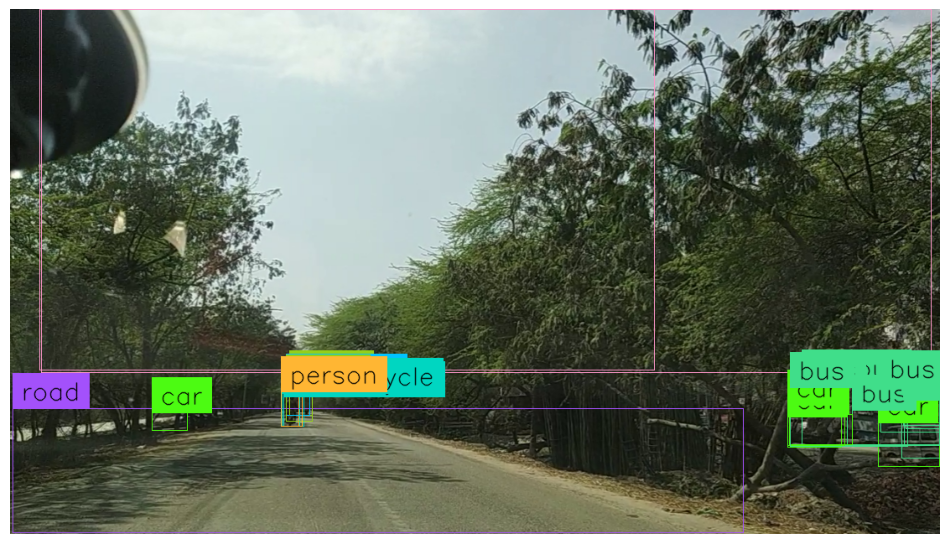

In [ ]:
sv.plot_image(annotated_image, (12, 12))

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'annotated_image' is an array-like image data.
# Here we plot the image
fig, ax = plt.subplots(figsize=(12, 12))  # Create a figure with custom size
ax.imshow(annotated_image)  # Display image data
ax.axis('off')  # Hide axes

# Save the image to a file
plt.savefig('saved_image.png', bbox_inches='tight', pad_inches=0)
plt.close(fig)  # Close the plot to free up memory


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = cv2.imread(SOURCE_IMAGE_PATH)
results = model.infer(image, confidence=0.006)
detections = sv.Detections.from_inference(results).with_nms(threshold=0.1)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the source and target directories
source_directory = '/content/drive/MyDrive/Screenshots'
target_directory = '/content/images'

# Make sure the target directory exists, create if not
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

counter = 1

# List all files in the source directory
for filename in os.listdir(source_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        source_path = os.path.join(source_directory, filename)
        target_filename = f"frame_{counter}.png"  # Generate target file name
        target_path = os.path.join(target_directory, target_filename)

        # Read the image
        image = cv2.imread(source_path)

        # Perform inference
        results = model.infer(image, confidence=0.04)
        detections = sv.Detections.from_inference(results)

        # Prepare labels
        labels = [
            f"{classes[class_id]}"
            for class_id, confidence
            in zip(detections.class_id, detections.confidence)
        ]

        # Annotate the image
        annotated_image = image.copy()
        annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
        annotated_image = LABEL_ANNOTATOR.annotate(annotated_image, detections, labels=labels)

        # Save the annotated image
        fig, ax = plt.subplots(figsize=(10, 10))  # Assuming the intended display size is 10x10 inches
        ax.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display
        ax.axis('off')  # Hide axes
        plt.savefig(target_path, bbox_inches='tight', pad_inches=0)
        plt.close(fig)  # Close the plot to free up memory
        counter += 1


print("Processing complete.")


Processing complete.


In [ ]:
import shutil
import os

# Define the path to the directory you want to delete
folder_path = '/content/drive/MyDrive/MinusZero-samples'

# Check if the directory exists
if os.path.exists(folder_path):
    # Remove the directory and all its contents
    shutil.rmtree(folder_path)
    print("The folder has been deleted.")
else:
    print("The folder does not exist.")


The folder has been deleted.


In [ ]:
import os
import shutil

# Define the source and target directories
source_directory = '/content/images'
target_directory = '/content/drive/MyDrive/MinusZero-samples'

# Make sure the target directory exists, create if not
if not os.path.exists(target_directory):
    os.makedirs(target_directory)

# Move all files from the source directory to the target directory
for filename in os.listdir(source_directory):
    if filename.endswith(('.png', '.jpg', '.jpeg')):  # Check for image files
        source_path = os.path.join(source_directory, filename)
        target_path = os.path.join(target_directory, filename)

        # Move the file
        shutil.move(source_path, target_path)

print("Files have been moved.")


Files have been moved.


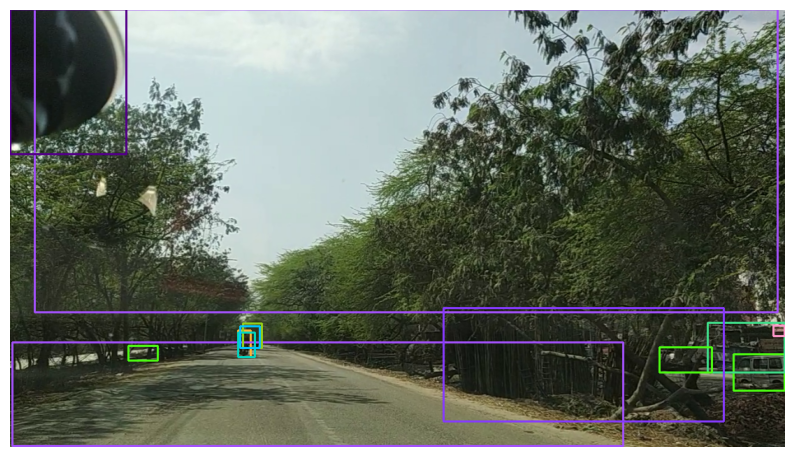

In [ ]:
labels = [
    f""
    for class_id, confidence
    in zip(detections.class_id, detections.confidence)
]


annotated_image = image.copy()
annotated_image = BOUNDING_BOX_ANNOTATOR.annotate(annotated_image, detections)
sv.plot_image(annotated_image, (10, 10))